### Rescaling axial distances in z-stack

This code reads in a z-stack recorded under refractive index mismatch and returns a z-stack with corrected axial distances.
Input: 
- refractive index of immersion medium (n1)
- refractive index of specimen (n2)
- numerical aperture of objective (NA)
- wavelength of emission (lam_0)
- voxel size of stack in both x and y (ps_xy)
- voxel size of stack in z (ps_z)

All length units are in micrometers.

Some of the functions are adapted from the PSF Extractor software: https://github.com/hoogenboom-group/PSF-Extractor

#### Load necessary packages:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

#### Set parameters and load stack:

In [3]:
# parameters
n1 = 1.
n2 = 1.46

NA = 0.8 
lam_0 = 0.58

ps_xy = 0.068
ps_z= 1.03 

# load files
location = 'D:\\axial_scaling\\data_dieletal\\OneDrive_1_9-20-2023\\' #location of stack
stack = load_stack(location+'tdtom_sx621_m1_sld2_slc3_whitematter_20x_12zoom_xyoptimal170_zoptimal103_s.tif')
shape_stack = np.shape(stack)

#### Rescale stack using depth-dependent scaling

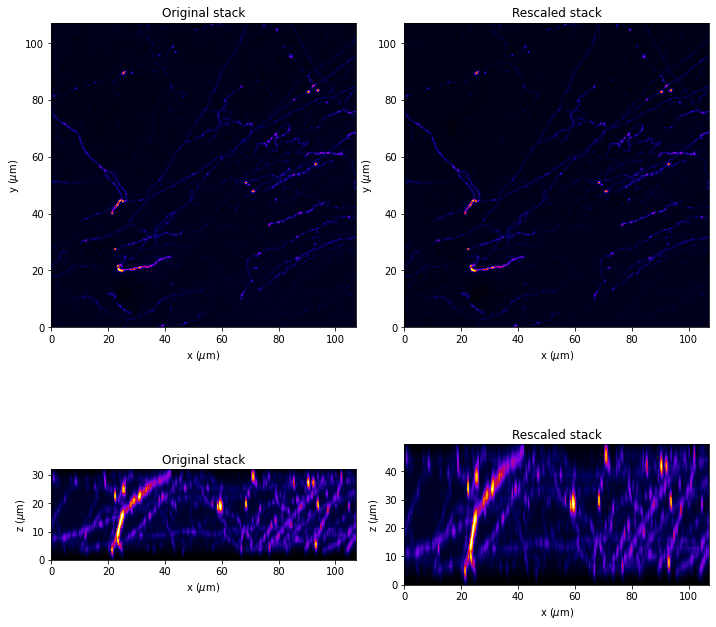

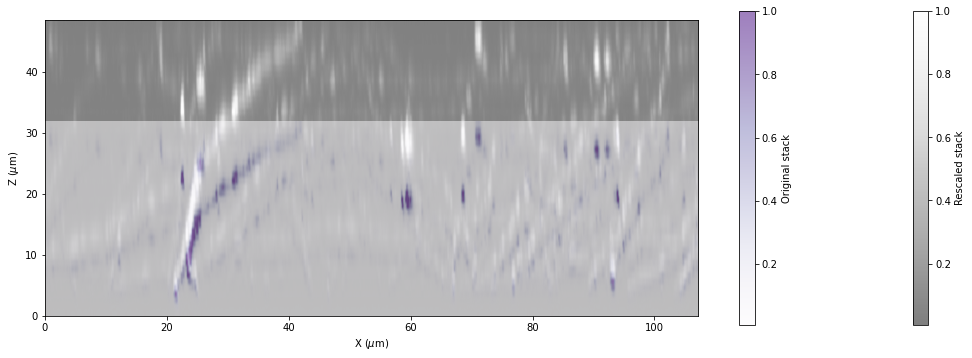

In [6]:
stack_rescaled, afp_new_stack, afp_stack, nfp_stack = rescale_stack(stack, NA, n1, n2, lam_0, ps_z)
        
# plot results:
plot_stacks_MIPs(stack,stack_rescaled,['Original stack','Rescaled stack'], ['xy','xz'], ps_xy, ps_z, ps_xy, ps_z)
plot_stacks_overlay(stack_rescaled,stack, afp_new_stack,afp_stack,nfp_stack,ps_xy,ps_z)

#### Save rescaled stack to file:

In [5]:
filename = 'rescaled_stack.tif'
save_stack(stack_rescaled, location,filename,ps_xy,ps_xy,ps_z)

Succesfully saved stack and parameters to file.
